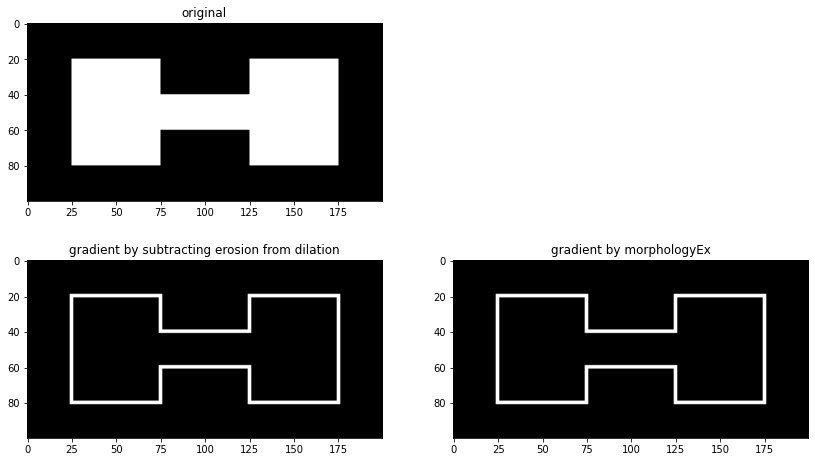

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

H = 100
W = 200
img = np.zeros([H,W], dtype=np.uint8)
img[20:80, 25:75] = 255
img[20:80, 125:175] = 255
img[40:60, 75:125] = 255

# Structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Approach-1: Perform erosion and dilation separately and then subtract
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations=1)
gradient1 = dilation - erosion

# Approach-2: Use cv2.morphologyEx()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

row=2
plt.subplot(row,2,1)
plt.title('original')
plt.imshow(img, cmap ='gray')

plt.subplot(row,2,3)
plt.title('gradient by subtracting erosion from dilation')
plt.imshow(gradient1, cmap ='gray')

plt.subplot(row,2,4)
plt.title('gradient by morphologyEx')
plt.imshow(gradient, cmap ='gray')

plt.gcf().set_size_inches(14, 8)
plt.show()

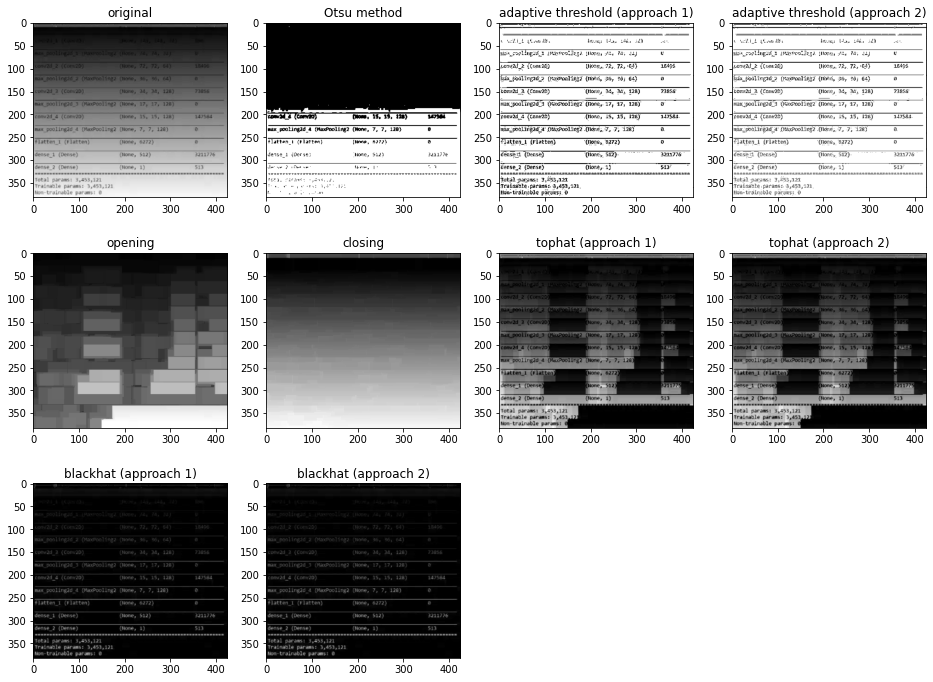

In [2]:
# Load an image in the greyscale
img = cv2.imread('adap1.png', cv2.IMREAD_GRAYSCALE)

# Apply Otsu method
ret, thres = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Approach 1 : Apply adaptive threshold 
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)

# Approach 2 : Apply adaptive threshold
blur = cv2.GaussianBlur(img, (5,5), 0)
row, column = np.where(img > blur-2)
blur[row, column] = 255

# Structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(25,25))

# Apply the opening operation
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Apply the closing operation
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Approach 1 : Apply the top hat transform
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Approach 2 : Apply the top hat transform
tophat_32f = cv2.addWeighted(img, 1, opening, -1, 0, dtype=cv2.CV_32F) # cv2.CV_8U cv2.CV_32F
abs_tophat_32f = np.absolute(tophat_32f)
tophat_8u1 = abs_tophat_32f/abs_tophat_32f.max()*255
tophat_8u = np.uint8(tophat_8u1)

# Approach 1 : Apply the black hat transform
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Approach 2 : Apply the black hat transform
blackhat_32f = cv2.addWeighted(closing, 1, img, -1, 0, dtype=cv2.CV_32F) # cv2.CV_8U cv2.CV_32F
abs_blackhat_32f = np.absolute(blackhat_32f)
blackhat_8u1 = abs_blackhat_32f/abs_blackhat_32f.max()*255
blackhat_8u = np.uint8(blackhat_8u1)

plt.subplot(3,4,1)
plt.title("original")
plt.imshow(img, cmap ='gray')

plt.subplot(3,4,2)
plt.title("Otsu method")
plt.imshow(thres, cmap ='gray')

plt.subplot(3,4,3)
plt.title("adaptive threshold (approach 1)")
plt.imshow(th3, cmap ='gray')

plt.subplot(3,4,4)
plt.title("adaptive threshold (approach 2)")
plt.imshow(blur, cmap ='gray')

plt.subplot(3,4,5)
plt.title("opening")
plt.imshow(opening, cmap ='gray')

plt.subplot(3,4,6)
plt.title("closing")
plt.imshow(closing, cmap ='gray')

plt.subplot(3,4,7)
plt.title("tophat (approach 1)")
plt.imshow(tophat, cmap ='gray')

plt.subplot(3,4,8)
plt.title("tophat (approach 2)")
plt.imshow(tophat_8u, cmap ='gray')

plt.subplot(3,4,9)
plt.title("blackhat (approach 1)")
plt.imshow(blackhat, cmap ='gray')

plt.subplot(3,4,10)
plt.title("blackhat (approach 2)")
plt.imshow(blackhat_8u, cmap ='gray')

plt.gcf().set_size_inches(16, 12)
plt.show()